<a href="https://colab.research.google.com/github/shebbir007/Python_Learning_Basics/blob/main/Class09(knn%2Cdecsntree%2Crndmforest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score,
roc_curve, roc_auc_score, auc)
#Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
print(" All libraries imported successfully!")




 All libraries imported successfully!


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [14]:
data=pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')
print("Dataset Shape:", data.shape)
print(f"Numeric Output Column:")
print(data['Outcome'].value_counts())
print(data.columns.tolist())

Dataset Shape: (768, 9)
Numeric Output Column:
Outcome
0    500
1    268
Name: count, dtype: int64
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [9]:
print("\nlist 5 rows:")
print(data.head())


list 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
print(data.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [56]:
#Separate input (X) and output (y)
X=data.drop('Outcome',axis=1)
y= data['Outcome']
print("X has all patient information (8 columns)")
print("y has diabetes yes/no (1 column)")


X has all patient information (8 columns)
y has diabetes yes/no (1 column)


In [57]:
#Split: 80% for training, 20% for testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% for test
    random_state=20 # Same result every time
)
print(f"\nComputer will train with: {len(X_train)} patients")
print(f"We will test with: {len(X_test)} patients")


Computer will train with: 614 patients
We will test with: 154 patients


## Decision Tree Classifier

In [58]:
dtc_model = DecisionTreeClassifier(
    max_depth=4,
    #Keep it simple not too complex
    random_state=20
)
print("DTC Model with training data...")
#Train the model
dtc_model.fit(X_train, y_train)
print("DTC Model training completed!")


DTC Model with training data...
DTC Model training completed!


In [59]:
#Check accuracy on training data
train_score = dtc_model.score(X_train, y_train)
print(f"Training accuracy: {train_score:.1%}")


Training accuracy: 81.1%


In [60]:
from sklearn.model_selection import cross_val_score
#Do 5-fold cross-validation
scores = cross_val_score(
dtc_model,
#Our model
X_train,
#Training data
y_train,
#Training labels
cv=5
#5 mini-tests
)
print("5 mini-test scores:")
for i in range(5):
    print(f" Test {i+1}: {scores[i]:.1%}")
print(f"\nAverage: {scores.mean():.1%}")
print(f"This means our model is {scores.mean():.1%} accurate!")



5 mini-test scores:
 Test 1: 74.0%
 Test 2: 65.9%
 Test 3: 69.1%
 Test 4: 80.5%
 Test 5: 72.1%

Average: 72.3%
This means our model is 72.3% accurate!


In [61]:
#Additionally Check accuracy on test data....No need below one is perfect.
test_score = dtc_model.score (X_test, y_test)

print(f"\nDTC Model Accuracy: {test_score:.3f} ({test_score*100:.1f}%)")
if test_score > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif test_score > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif test_score > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")



DTC Model Accuracy: 0.753 (75.3%)
Needs improvement...


#DTC Model Testing

In [62]:
#Model testing
print("Now let's see how good our DTC model is...")
#Make predictions
predictions = dtc_model.predict(X_test)
print("DTC Model made predictions for all test patients!")
#Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nDTC Model Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")


Now let's see how good our DTC model is...
DTC Model made predictions for all test patients!

DTC Model Accuracy: 0.753 (75.3%)
Needs improvement...


# Feature **Importance**


 Feature Importance (Decision Tree):
                 Feature  Importance
                 Glucose    0.496431
                     BMI    0.236404
                     Age    0.120407
DiabetesPedigreeFunction    0.056714
             Pregnancies    0.036731
           BloodPressure    0.028099
                 Insulin    0.025213
           SkinThickness    0.000000


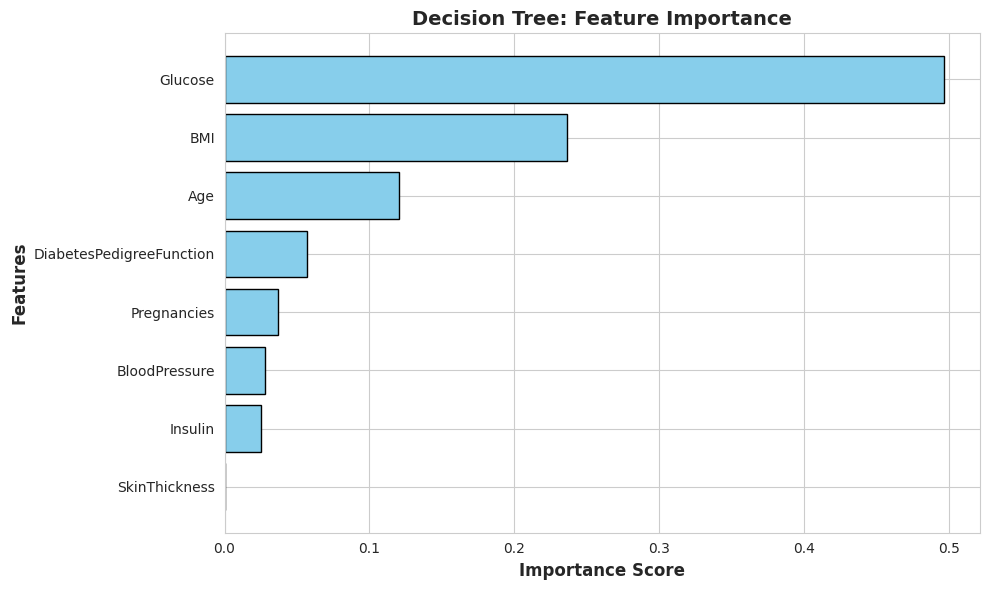


 These features are most important for prediction!



In [65]:
print("\n Feature Importance (Decision Tree):")
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dtc_model.feature_importances_
}).sort_values("Importance", ascending=False)
print(feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='skyblue', edgecolor="black")
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Decision Tree: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("\n These features are most important for prediction!")
print("\n" + "="*60)

Confusion metrics

Confusion Matrix:
[[86 15]
 [23 30]]

Correct: 116
Wrong: 38


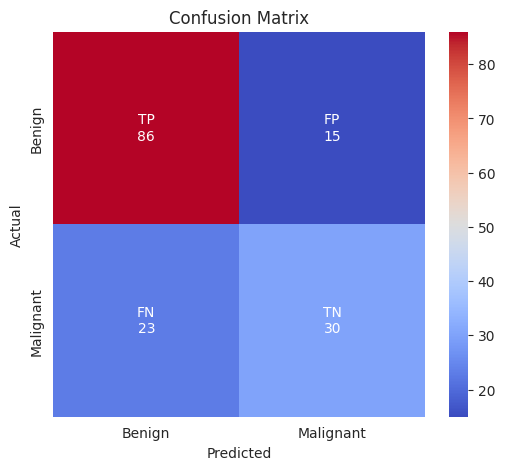

In [85]:
cm = confusion_matrix(y_test, predictions)

cm_labels = [
    [f'TP\n{cm[0,0]}', f'FP\n{cm[0,1]}'],
    [f'FN\n{cm[1,0]}', f'TN\n{cm[1,1]}']
]

#Print it
print("Confusion Matrix:")
print(cm)
print(f"\nCorrect: {cm[0,0] + cm[1,1]}")
print(f"Wrong: {cm[0,1] + cm[1,0]}")
#Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap="coolwarm",
xticklabels=['Benign', 'Malignant'],
yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


Calculate Evaluation Metrics

Accuracy: 0.75
Precision: 0.67
Recall: 0.57
F1-Score: 0.61


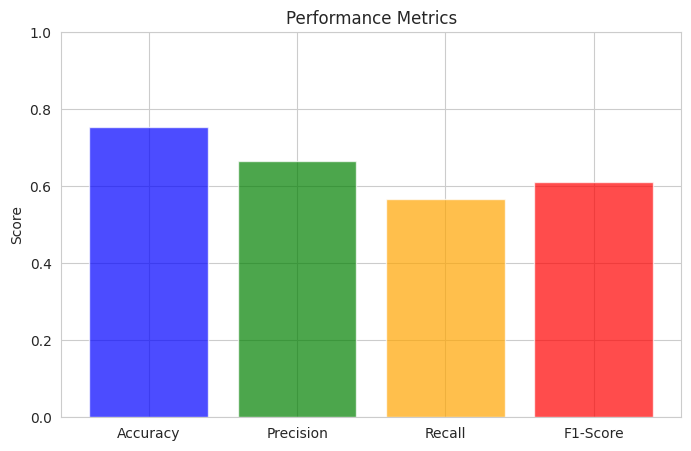

In [86]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
#Print them
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#Simple bar chart
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values= [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()


# **Random Forest Classifier**

In [79]:
#Train Random Forest
print("&& Training Random Forest...\n")
rf_model = RandomForestClassifier(
n_estimators=150, # 150 trees
max_depth=5,
min_samples_split=20,
min_samples_leaf=10,
random_state=42,
n_jobs=-1 # Use all CPU cores
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest trained!")
print(f"{rf_model.n_estimators} trees created")
print("Each tree votes")
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy * 100:.2f}%) ")

&& Training Random Forest...

Random Forest trained!
150 trees created
Each tree votes

Random Forest Accuracy: 0.7468 (74.68%) 



 Feature Importance (Random Forest):
                 Feature  Importance
                 Glucose    0.369946
                     BMI    0.175350
                     Age    0.153782
             Pregnancies    0.084891
DiabetesPedigreeFunction    0.077855
                 Insulin    0.057922
           SkinThickness    0.042440
           BloodPressure    0.037815


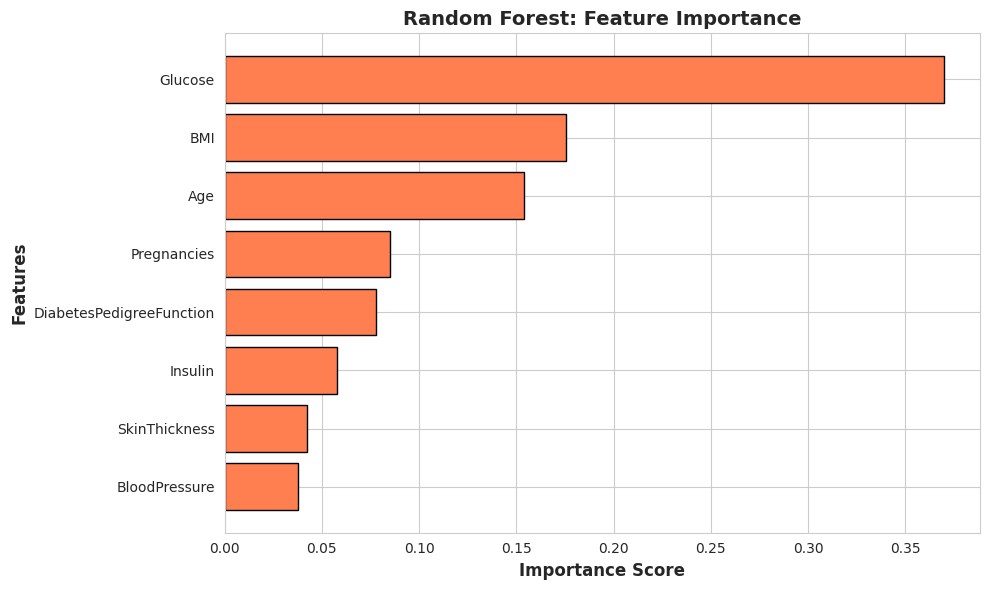


 Random Forest importance is more reliable!
 (Average of 150 trees)



In [70]:
#Feature Importance
print("\n Feature Importance (Random Forest):")
rf_feature_importance = pd.DataFrame({
'Feature': X.columns,
'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(rf_feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='coral', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Random Forest: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("\n Random Forest importance is more reliable!")
print(" (Average of " + str(rf_model.n_estimators) + " trees)")
print("\n" + "="*60)

##KNN Classifier

In [30]:
#Problem: Some numbers are big, some are small
print("Before scaling different ranges:")
print(f"Age: smallest={X_train['Age'].min()}, biggest={X_train['Age'].max()}")
print(f"Insulin: smallest={X_train['Insulin'].min()}, biggest={X_train['Insulin'].max()}")
print("\nAge goes from 21 to 81 (small range)")
print("Insulin goes from 6 to 846 (big range)")
print("This confuses the model!")


Before scaling different ranges:
Age: smallest=21, biggest=81
Insulin: smallest=0, biggest=744

Age goes from 21 to 81 (small range)
Insulin goes from 6 to 846 (big range)
This confuses the model!


# **Scalling**

In [32]:
print(X_train.head())


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
446            1      100             72             12       70  25.3   
260            3      191             68             15      130  30.9   
570            3       78             70              0        0  32.5   
590           11      111             84             40        0  46.8   
30             5      109             75             26        0  36.0   

     DiabetesPedigreeFunction  Age  
446                     0.658   28  
260                     0.299   34  
570                     0.270   39  
590                     0.925   45  
30                      0.546   60  


In [39]:
scaler = StandardScaler()
#Learn from training data and scale it
X_train_scaled = scaler.fit_transform(X_train)
#Scale test data (just transform, don't fit)
X_test_scaled = scaler.transform(X_test)
print("\nAfter scaling:")
print("All features now have similar rangel")
print(f"Example First patient's age before scaling: {X_train.values[0][7]}")
print(f"Example First patient's age after scaling: {X_train_scaled[0][7]:.2f}")



After scaling:
All features now have similar rangel
Example First patient's age before scaling: 28.0
Example First patient's age after scaling: -0.43


# **Data Split**

In [40]:
#Split: 80% for training, 20% for testing

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% for test
    random_state=20 # Same result every time
)
print(f"\nComputer will train with: {len(X_train_scaled)} patients")
print(f"We will test with: {len(X_test_scaled)} patients")


Computer will train with: 614 patients
We will test with: 154 patients


# KNN Model Train

In [82]:
for kn in range(1, 25):
    knn_model = KNeighborsClassifier(
      n_neighbors=kn
    )
    print(f"KNN Model with training data for n_neighbors={kn}...")
    #Train the model
    knn_model.fit(X_train_scaled, y_train)
    print("KNN Model training completed!")

KNN Model with training data for n_neighbors=1...
KNN Model training completed!
KNN Model with training data for n_neighbors=2...
KNN Model training completed!
KNN Model with training data for n_neighbors=3...
KNN Model training completed!
KNN Model with training data for n_neighbors=4...
KNN Model training completed!
KNN Model with training data for n_neighbors=5...
KNN Model training completed!
KNN Model with training data for n_neighbors=6...
KNN Model training completed!
KNN Model with training data for n_neighbors=7...
KNN Model training completed!
KNN Model with training data for n_neighbors=8...
KNN Model training completed!
KNN Model with training data for n_neighbors=9...
KNN Model training completed!
KNN Model with training data for n_neighbors=10...
KNN Model training completed!
KNN Model with training data for n_neighbors=11...
KNN Model training completed!
KNN Model with training data for n_neighbors=12...
KNN Model training completed!
KNN Model with training data for n_ne

In [76]:
#Check accuracy on training data
train_score = knn_model.score(X_train_scaled, y_train)
print(f"Training accuracy: {train_score:.1%}")


Training accuracy: 78.7%


In [83]:
test_score = knn_model.score (X_test_scaled, y_test)

print(f"\nKNN Model Accuracy: {test_score:.3f} ({test_score*100:.1f}%)")
if test_score > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif test_score > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif test_score > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")


KNN Model Accuracy: 0.760 (76.0%)
Needs improvement...


In [92]:
predictions=knn_model.predict(X_test_scaled)
print("KNN Model made predictions for all test patients!")
accuracy=accuracy_score(y_test,predictions)
print(f"Test accuracy: {accuracy:.3f}({accuracy*100:.1f}%)")

KNN Model made predictions for all test patients!
Test accuracy: 0.760(76.0%)


Confusion Matrix:
[[92  9]
 [28 25]]

Correct: 117
Wrong: 37


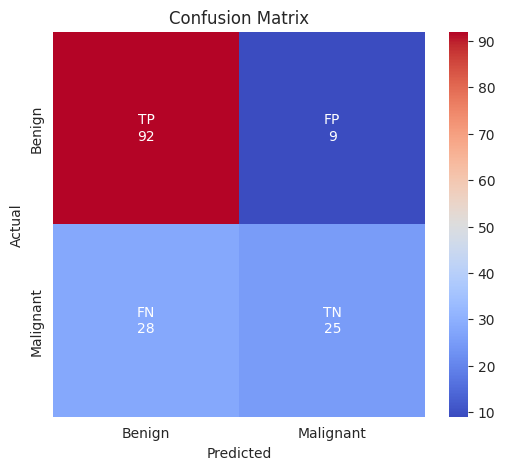

In [93]:
cm = confusion_matrix(y_test, predictions)

cm_labels = [
    [f'TP\n{cm[0,0]}', f'FP\n{cm[0,1]}'],
    [f'FN\n{cm[1,0]}', f'TN\n{cm[1,1]}']
]

#Print it
print("Confusion Matrix:")
print(cm)
print(f"\nCorrect: {cm[0,0] + cm[1,1]}")
print(f"Wrong: {cm[0,1] + cm[1,0]}")
#Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap="coolwarm",
xticklabels=['Benign', 'Malignant'],
yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


# evaluation **metrics**

Accuracy: 0.76
Precision: 0.74
Recall: 0.47
F1-Score: 0.57


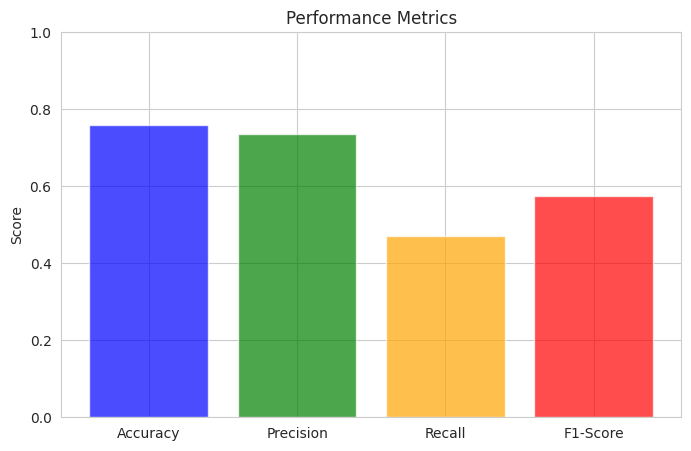

In [96]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
#Print them
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#Simple bar chart
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values= [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()


# **All Three (03) Clasifiers Comparison**

In [95]:
#Compare All Models
print("Final Model Comparison")
print("-" * 60)

# Retrieve accuracies from previous execution outputs, as global variables were overwritten
# DTC Accuracy from cell TuTJ4H5rnnwq / S4ZTwGx5oeDC
dt_accuracy = 0.753
# RF Accuracy is stored in rf_accuracy variable
# KNN Accuracy from
knn_accuracy = 0.760

comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [dt_accuracy, rf_accuracy, knn_accuracy]
})

comparison = comparison.sort_values("Accuracy", ascending=False)

print("\n" + comparison.to_string(index=False))

best_model = comparison.iloc[0]["Model"]
best_acc = comparison.iloc[0]["Accuracy"]

print("\nWINNER:")
print(f"  {best_model} Accuracy: {best_acc:.3f} ({best_acc*100:.2f}%)")
print("\n" + "="*60)

Final Model Comparison
------------------------------------------------------------

        Model  Accuracy
          KNN  0.760000
Decision Tree  0.753000
Random Forest  0.746753

WINNER:
  KNN Accuracy: 0.760 (76.00%)

